# Домашня робота №7

# Перетворення випадкових величин

In [16]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

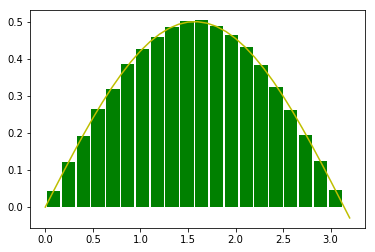

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

f = uniform(-0.5, 1)

a = 1/2
def func(y):
    return np.arcsin(y / a) + np.pi / 2

x = np.arange(0, np.pi + 0.1, 0.1)
 
plt.plot(x, a * np.sin(x), 'y')
b = func(f.rvs(size=100000))
plt.hist(b, density=True, rwidth=0.9, bins=20, color = 'green')
plt.show()

### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

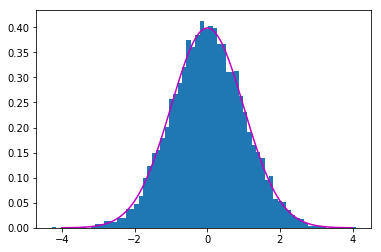

In [18]:
from scipy.stats import norm

x = np.arange(-4.01, 4, 0.1)
n_pdf = norm(0, 1).pdf(x)
u = uniform(0, 1).rvs(size=10000)
y = norm(0, 1).ppf(u)
plt.hist(y, density=True, bins=70)
plt.plot(x, n_pdf, 'm')
plt.show()

## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

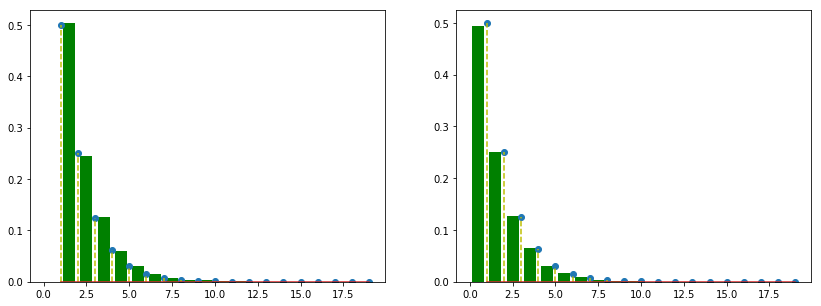

In [19]:
from scipy.stats import geom

a = geom(0.5)
d = plt.gcf()
d.set_size_inches(14, 5)

b = a.rvs(size = 10000) - 1
    
x = np.arange(1, 20,1) 
a1 = a.rvs(size=10000)
   
plt.subplot(121)
a1 = a.rvs(size=10000)
plt.stem(x, a.pmf(x), 'y--')
plt.hist(a1, density=True, rwidth=0.7, bins=range(15), color = 'green')
    
plt.subplot(122)
plt.stem(x, a.pmf(x), 'y--')
plt.hist(b, density=True, rwidth=0.7, bins=range(15), color = 'green')
plt.show()

## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

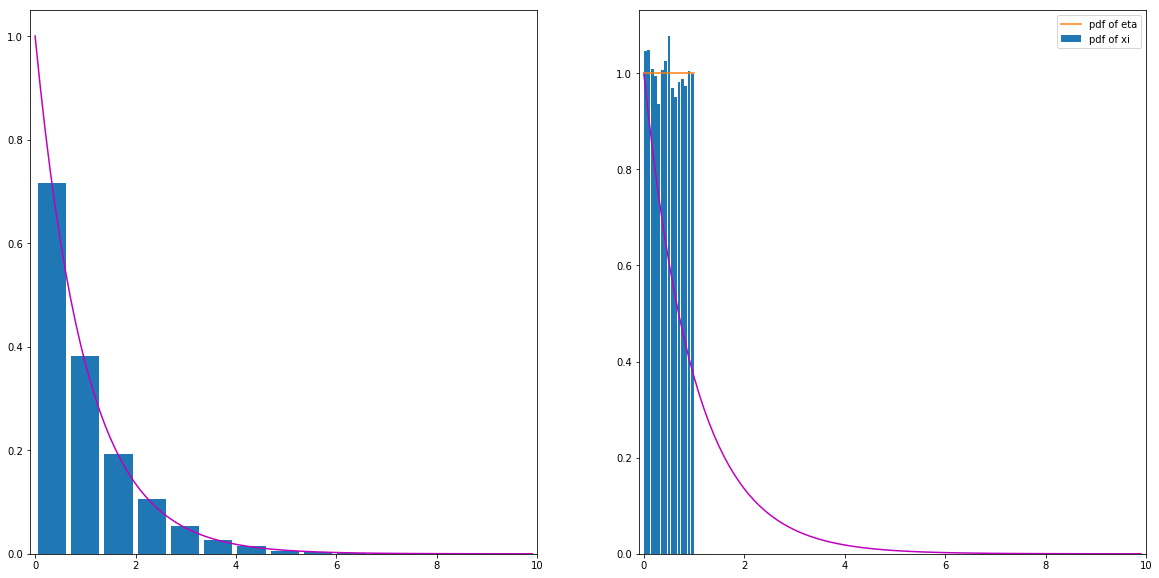

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

xi = expon(0, 1)
xi_rvs = expon(0, 1).rvs(size=10000)
x = np.arange(0, 10, 0.1)
xi_pdf = expon(0, 1).pdf(x)
eta = np.exp(-xi_rvs)

fig = plt.figure(figsize=(20,5))
fig.set_size_inches(20, 10)
plt.subplots_adjust(hspace=0.4)

plt.subplot(1, 2, 1, xlim=(-0.1, 10))
plt.hist(xi_rvs, density=True, rwidth=0.85, bins = 15)
plt.plot(x, xi_pdf, 'm')

plt.subplot(1, 2, 2, xlim=(-0.1, 10))
plt.hist(eta, density=True, rwidth=0.85, bins=15, label='pdf of xi')
plt.plot(x, xi_pdf, 'm')
plt.plot(np.arange(0, 2), (1, 1), label='pdf of eta')
plt.legend()

plt.show()

### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

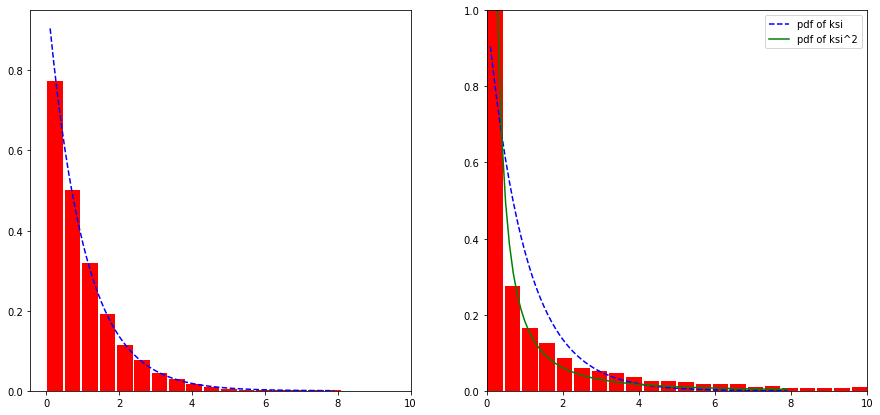

In [21]:
e = expon()

a1 = e.rvs(10000)
x = np.arange(0.1, 8, 0.1)
f = plt.gcf()
f.set_size_inches(15, 7)

plt.subplot(121)
plt.hist(a1, bins=20, density=True, rwidth=0.9, color = 'red')
plt.plot(x, e.pdf(x), 'b--')

plt.subplot(122)
plt.hist(a1 ** 2, bins=200, density=True, rwidth=0.9, color = 'red')
plt.plot(x, e.pdf(x), 'b--', label='pdf of ksi')
plt.plot(x, np.exp(-np.sqrt(x)) / (2 * x),'g', label='pdf of ksi^2')
plt.axis([0,10,0,1])

plt.legend(loc='best')
plt.show()

## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

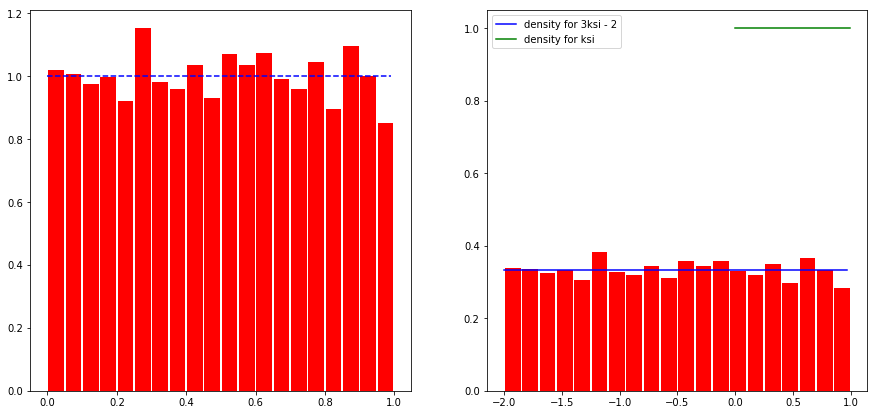

In [22]:
from scipy.stats import uniform
f = plt.gcf()
f.set_size_inches(15, 7)

a = uniform(0, 1)
n = 10000
b = a.rvs(n)
x = np.arange(0, 1, 0.01)

plt.subplot(121)
plt.hist(b, bins=20, density=True, rwidth=0.9,color = 'red')
plt.plot(x, a.pdf(x), 'b--')

plt.subplot(122)
plt.hist(3*b - 2, bins=20, density=True, rwidth=0.9, color = 'red')
plt.plot(3*x - 2, a.pdf((x + 2) / 3) / 3, 'b', label='density for 3ksi - 2')
plt.plot(x, a.pdf(x),'g', label='density for ksi')
plt.legend(loc='best')

plt.show()

### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

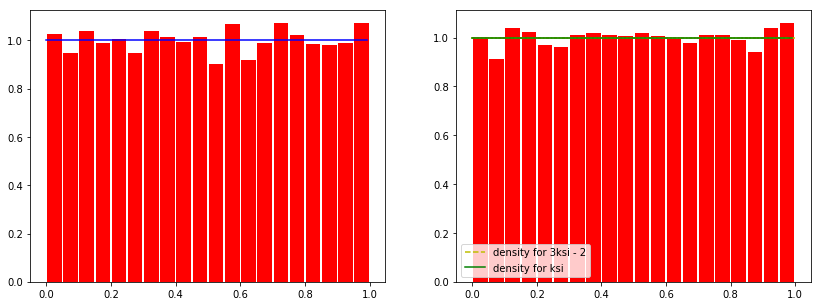

In [23]:
f = plt.gcf()
f.set_size_inches(14, 5)
b = uniform(0, 1)
n = 10000
a = b.rvs(n)
 
plt.subplot(121)
plt.hist(a, density=True, rwidth=0.9, bins=20, color = 'red')
plt.plot(x, b.pdf(x), 'b')

plt.subplot(122)
plt.hist(abs(2*a - 1), density=True, rwidth=0.9, bins=20, color = 'red')
plt.plot(np.abs(2*x - 1), b.pdf((x + 1) / 2) + b.pdf(-(x + 1) / 2), 'y--', label='density for 3ksi - 2')

plt.plot(x, [1]*len(x),'g', label='density for ksi')
plt.legend(loc='best')

plt.show()

### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


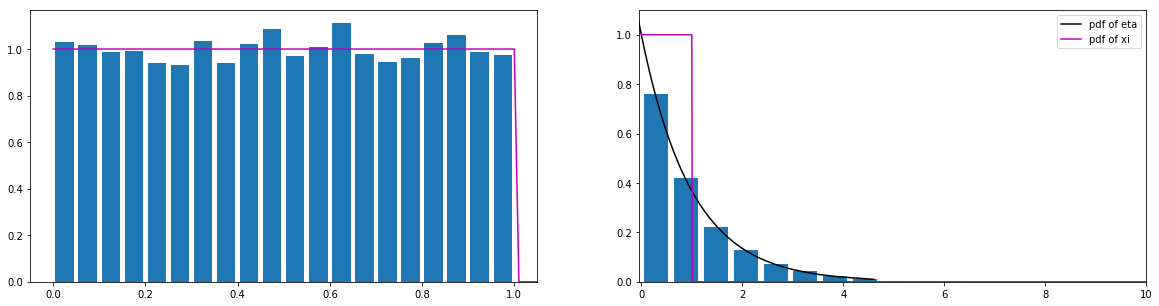

In [24]:
x = np.arange(0, 10, 0.01)
xi = uniform(0, 1)
xi_rvs = xi.rvs(size=10000)
eta = -np.log(xi_rvs)
y = -np.log(x)
eta_pdf = x * xi.pdf(np.exp(-x))

fig = plt.figure(figsize=(20,5))
fig.set_size_inches(20, 5)
plt.subplots_adjust(hspace=0.4)

plt.subplot(1, 2, 1, xlim=(-0.05, 1.05))
plt.hist(xi_rvs, density=True, rwidth=0.8, bins=20)
plt.plot(x, xi.pdf(x), 'm')

plt.subplot(1, 2, 2, xlim=(-0.05, 10), ylim=(0, 1.1))
plt.hist(eta, density=True, rwidth=0.8, bins=20)
plt.plot(y, eta_pdf, color='k', label="pdf of eta")
plt.plot(x, xi.pdf(x), color='m', label="pdf of xi")

plt.legend()
plt.show()

## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [25]:
def func(size=1):
    return tuple(zip(uniform(0, 1).rvs(size=size), uniform(0, 1).rvs(size=size)))

Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

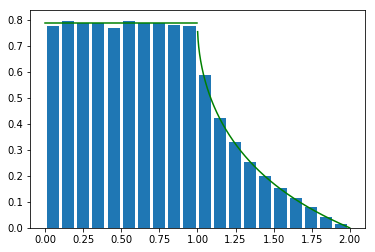

In [26]:
n = 100000
xi = tuple(zip(uniform.rvs(size=n), uniform.rvs(size=n)))
xi_1 = [xi[i][0]**2 + xi[i][1]**2 for i in range(len(xi))]

z1 = np.arange(1.001, 2, 0.001)
f_z1 = np.pi/4 - np.arccos(z1**(-0.5)) -0.5*(z1-1)**(-0.5) + 0.5*(z1-1)**(-0.5)
z2 = np.arange(0, 1.5, 0.5)
f_z2 = [np.pi/4 for i in range(len(z2))]

plt.hist(xi_1, density=True, rwidth=0.8, bins=20)
plt.plot(z1, f_z1, 'g', z2, f_z2, 'g')
plt.show()

Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

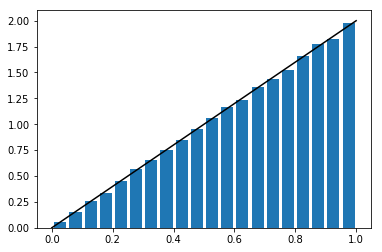

In [27]:
xi_2 = [max(xi[i][0], xi[i][1]) for i in range(len(xi))]
z = np.arange(0, 1.01, 0.01)
f_z = 2*z

plt.hist(xi_2, density=True, rwidth=0.8, bins=20)
plt.plot(z, f_z, 'k')

plt.show()

Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

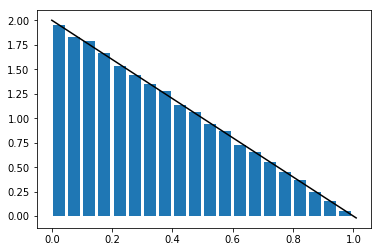

In [28]:
xi_3 = [abs(xi[i][0] - xi[i][1]) for i in range(len(xi))]
z = np.arange(0, 1.01, 0.001)
f_z = -2*z + 2

plt.hist(xi_3, density=True, rwidth=0.8, bins=20)
plt.plot(z, f_z, 'k')

plt.show()